Working with file: /Users/nicholaswhite/data/01_S_39165_E_39225.txt
*-----------------------------------------*
Actual onset at time: 39173.4
Actual onset at time: 39174.788545
Actual onset at time: 39186.114252
Actual onset at time: 39190.575
Actual onset at time: 39190.9394722
Actual onset at time: 39205.068
Actual onset at time: 39208.548
Actual onset at time: 39209.045
Actual onset at time: 39209.321
Actual onset at time: 39209.766
Actual onset at time: 39210.293
Actual onset at time: 39210.647
Actual onset at time: 39211.134
Actual onset at time: 39211.4979014
Actual onset at time: 39211.5679946
Actual onset at time: 39212.18
Actual onset at time: 39212.3292075
Actual onset at time: 39212.9726636
Actual onset at time: 39213.021
Actual onset at time: 39214.0899502
Actual onset at time: 39215.315
Actual onset at time: 39215.695
Actual onset at time: 39218.953
*-----------------------------------------*
Highest peak number 0 is: 39193.5605442 0.773804870564
Highest peak number 1 is: 


Highest peak number 4 is: 39192.7362358 0.760388506152
Highest peak number 5 is: 39195.9057596 0.754788501126
Highest peak number 6 is: 39217.4887075 0.750828830746
Highest peak number 7 is: 39188.2083447 0.750217174969
Highest peak number 8 is: 39220.9368707 0.737263557507
Highest peak number 9 is: 39171.5828571 0.730247596839


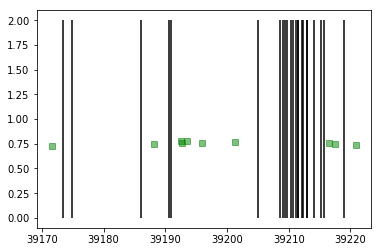

In [6]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter
import sox

import DetectionEvalSourceCode as det
import Paths as p

duration_length = 605
ymin = 0
ymax = 2
unit = 1
start_time = 39165
end_time = 39225
fmin_input = 1500
h_length = 256
sr = 22050
h_duration = h_length / sr
feature_input = librosa.stft

index = []
peaksClean = []
indexClean = []
test_fmeasures = []
trueOnsets = []
peaksSorted = []
outputFiles = []

cbn = sox.Combiner()


checkFile = p.get_peaks(unit) + "01_S_" + str(start_time) + "_E_" + str(end_time) + "_detections.npy"
checkFilePeaks = p.get_peaks(unit) + "01_S_" + str(start_time) + "_E_" + str(end_time) + "_peaks.npy"

file = p.get_data() + str(unit).zfill(2) + "_S_" + str(start_time) + "_E_" + str(end_time) + ".txt"


# TRUE ONSETS 
# Below are the true onsets, which are represented in the graph as vertical lines

print("Working with file: " + file)

print("*-----------------------------------------*")

with open(file, "r") as text_file:
    for i in text_file:
        i = i.strip('\n')
        trueOnsets.append(i)


for x in trueOnsets:
    x = float(x)
    plt.vlines(x, ymin, ymax, colors='k', linestyles='solid', label='')
    print("Actual onset at time: " + str(x))

    

# PEAKS FROM DETECTIONS
# Below are the peaks from the peak picking function, which are represented in the graph as red squares

peaks = np.load(checkFilePeaks)

print("*-----------------------------------------*")

threshold = 0.5
for i in peaks:
    if i[0] > threshold:
        #dont want to plot points so you can see just the top 10 highest
        continue
        #uncomment next line to plot all peaks
        #plt.plot(i[1]+start_time,i[0],'rs',alpha=0.5)


#SORTING FOR TOP 10 HIGHEST ESTIMATED ONSET PEAKS
#sort by the first item in each array
peaks = sorted(peaks,key=itemgetter(0))
#reverse the list to have the highest 10 peaks first
peaksSorted = list(reversed(peaks))

for peak in range(10):
    plt.plot(peaksSorted[peak][1]+start_time,peaksSorted[peak][0],'gs',alpha=0.5)
    print("Highest peak number " + str(peak) + " is: "+ str(peaksSorted[peak][1]+start_time) + " " + str(peaksSorted[peak][0]))
    tfm = sox.Transformer()
    s_trim = (peaksSorted[peak][1]+start_time) - 1
    e_trim = (peaksSorted[peak][1]+start_time) + 1
    tfm.trim(s_trim, e_trim)
    outputFile =  p.get_false_positives() + "unit" + str(unit).zfill(2) + "_S_" + str(start_time) + "_E_" + str(end_time) + "_fp_" + str(peaksSorted[peak][1]+start_time) +".wav"
    tfm.build(p.get_unit_recordings() + str(unit).zfill(2) + ".flac",outputFile)
    outputFiles.append(outputFile)
    outputFiles.append(p.get_data() + "next.wav")


outputFiles = outputFiles[:-1]
cbn.build(outputFiles, p.get_false_positives() + "unit" + str(unit).zfill(2) + "_S_" + str(start_time) + "_E_" + str(end_time) + "_concat_fp.wav" , 'concatenate')


plt.show()